In [ ]:
# Instalando librerías necesarias
!pip install statsbombpy
!pip install mplsoccer
!pip install highlight_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
# Importando paquetes necesarios para visualizar y manipular datos
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

In [ ]:
# Manipulacion de datos


# Traer Tabla de las competiciones abiertas desde la API libre de StatsBomb
# La tabla la guardo en una variable llamada free_comps
free_comps = sb.competitions()
# Solo con eescribir el nombre de la variable sin nada mas, se muestra
free_comps

competition_id  season_id   country_name    competition_name  \
0                9         27        Germany       1. Bundesliga   
1               16          4         Europe    Champions League   
2               16          1         Europe    Champions League   
3               16          2         Europe    Champions League   
4               16         27         Europe    Champions League   
..             ...        ...            ...                 ...   
62              55         43         Europe           UEFA Euro   
63              35         75         Europe  UEFA Europa League   
64              53        106         Europe   UEFA Women's Euro   
65              72        107  International   Women's World Cup   
66              72         30  International   Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                      False   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
62               male              False                       True   
63               male              False                      False   
64             female              False                       True   
65             female              False                       True   
66             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2015/2016  2023-08-17T23:51:11.837478                        None   
1    2018/2019  2023-03-07T12:20:48.118250     2021-06-13T16:17:31.694   
2    2017/2018  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
3    2016/2017  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
4    2015/2016  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
62        2020  2023-02-24T21:26:47.128979  2023-04-27T22:38:34.970148   
63   1988/1989  2023-06-18T19:28:39.443883     2021-06-13T16:17:31.694   
64        2022  2023-07-17T21:19:03.032991  2023-07-17T21:21:56.497106   
65        2023  2023-09-01T12:34:19.705316  2023-09-01T12:35:45.762196   
66        2019  2023-07-27T10:33:48.273734     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0                         None  2023-08-17T23:51:11.837478  
1                         None  2023-03-07T12:20:48.118250  
2                         None  2021-01-23T21:55:30.425330  
3                         None            2020-07-29T05:00  
4                         None            2020-07-29T05:00  
..                         ...                         ...  
62  2023-04-27T22:38:34.970148  2023-02-24T21:26:47.128979  
63                        None  2023-06-18T19:28:39.443883  
64  2023-07-17T21:21:56.497106  2023-07-17T21:19:03.032991  
65  2023-09-01T12:35:45.762196  2023-09-01T12:34:19.705316  
66                        None  2023-07-27T10:33:48.273734  

[67 rows x 12 columns]

In [ ]:
# Para seleccionar Partidos de la competicion seleccionada debemos  usar la clase (función) sb.matches y pasarle un competition_id y un season_id
# Estos valores se sacan de la tabla anterior o de la página web de StatsBomb
mundial_2022 = sb.matches(competition_id=43, season_id=106)
mundial_2022

match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_team  home_score  away_score match_status  ...  \
0        Serbia  Switzerland           2           3    available  ...   
1     Argentina    Australia           2           1    available  ...   
2     Australia      Denmark           1           0    available  ...   
3        Brazil       Serbia           2           0    available  ...   
4       Tunisia    Australia           0           1    available  ...   
..          ...          ...         ...         ...          ...  ...   
59       Mexico       Poland           0           0    available  ...   
60  South Korea     Portugal           2           1    available  ...   
61        Wales      England           0           3    available  ...   
62        Japan        Spain           2           1    available  ...   
63      Denmark      Tunisia           0           0    available  ...   

              last_updated_360 match_week competition_stage  \
0   2023-04-26T23:49:58.956186          3       Group Stage   
1   2023-07-30T07:48:51.865595          4       Round of 16   
2   2023-06-20T11:04:37.638969          3       Group Stage   
3   2023-07-11T14:56:31.096588          1       Group Stage   
4   2023-04-27T00:30:07.835815          2       Group Stage   
..                         ...        ...               ...   
59  2023-04-27T00:49:30.005344          1       Group Stage   
60  2023-04-26T23:48:08.999798          3       Group Stage   
61  2023-04-27T00:02:44.241621          3       Group Stage   
62  2023-04-26T23:51:48.352990          3       Group Stage   
63  2023-07-29T19:44:56.738444          1       Group Stage   

                                 stadium                         referee  \
0                            Stadium 974       Fernando Andrés Rapallini   
1                  Ahmad bin Ali Stadium                Szymon Marciniak   
2                   Al Janoub Stadium                   Mustapha Ghorbal   
3                         Lusail Stadium                 Alireza Faghani   
4                   Al Janoub Stadium                     Daniel Siebert   
..                                   ...                             ...   
59                           Stadium 974                     Chris Beath   
60               Education City Stadium           Facundo Tello Figueroa   
61                 Ahmad bin Ali Stadium                   Slavko Vinčić   
62  Sheikh Khalifa International Stadium  Victor Miguel de Freitas Gomes   
63               Education City Stadium    César Arturo Ramos Palazuelos   

               home_managers                              away_managers  \
0           Dragan Stojković                                Murat Yakin   
1   Lionel Sebastián Scaloni                        Graham James Arnold   
2        Graham James Arnold                            Kasper Hjulmand   
3      Telê Santana da Silva                           Dragan Stojković   
4                Jalel Kadri                        Graham James Arnold   
..                    

In [ ]:
# Filtramos a solo los partidos que nos interesan
# De todos los partidos elegimos los cuales tengan como local o vistante a Argentina
# Se usa el simbolo | como "OR" de Lógica
# y se usa una condicion o la otra en este caso y se guarda en una variable partidos_argentina
partidos_argentina = mundial_2022.loc[(mundial_2022['home_team'] == 'Argentina')|(mundial_2022['away_team'] == 'Argentina')]
partidos_argentina

match_id  match_date      kick_off                     competition season  \
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
6    3869321  2022-12-09  21:00:00.000  International - FIFA World Cup   2022   
9    3869685  2022-12-18  17:00:00.000  International - FIFA World Cup   2022   
11   3857264  2022-11-30  21:00:00.000  International - FIFA World Cup   2022   
13   3857289  2022-11-26  21:00:00.000  International - FIFA World Cup   2022   
19   3869519  2022-12-13  21:00:00.000  International - FIFA World Cup   2022   
37   3857300  2022-11-22  12:00:00.000  International - FIFA World Cup   2022   

      home_team     away_team  home_score  away_score match_status  ...  \
1     Argentina     Australia           2           1    available  ...   
6   Netherlands     Argentina           2           2    available  ...   
9     Argentina        France           3           3    available  ...   
11       Poland     Argentina           0           2    available  ...   
13    Argentina        Mexico           2           0    available  ...   
19    Argentina       Croatia           3           0    available  ...   
37    Argentina  Saudi Arabia           1           2    available  ...   

              last_updated_360 match_week competition_stage  \
1   2023-07-30T07:48:51.865595          4       Round of 16   
6   2023-06-21T17:51:12.511460          5    Quarter-finals   
9   2023-08-17T15:55:15.164685          7             Final   
11  2023-07-25T09:10:13.832053          3       Group Stage   
13  2023-06-20T11:57:08.547882          2       Group Stage   
19  2023-04-26T22:32:37.808359          6       Semi-finals   
37  2023-06-19T15:59:46.628887          1       Group Stage   

                  stadium                     referee  \
1   Ahmad bin Ali Stadium            Szymon Marciniak   
6          Lusail Stadium  Antonio Miguel Mateu Lahoz   
9          Lusail Stadium            Szymon Marciniak   
11            Stadium 974      Danny Desmond Makkelie   
13         Lusail Stadium              Daniele Orsato   
19         Lusail Stadium              Daniele Orsato   
37         Lusail Stadium               Slavko Vinčić   

               home_managers             away_managers data_version  \
1   Lionel Sebastián Scaloni       Graham James Arnold        1.1.0   
6             Louis van Gaal  Lionel Sebastián Scaloni        1.1.0   
9   Lionel Sebastián Scaloni          Didier Deschamps        1.1.0   
11       Czesław Michniewicz  Lionel Sebastián Scaloni        1.1.0   
13  Lionel Sebastián Scaloni    Gerardo Daniel Martino        1.1.0   
19  Lionel Sebastián Scaloni              Zlatko Dalić        1.1.0   
37  Lionel Sebastián Scaloni              Hervé Renard        1.1.0   

   shot_fidelity_version xy_fidelity_version  
1                      2                   2  
6                      2                   2  
9                      2                   2  
11                     2                   2  
13                     2                   2  
19                     2                   2  
37                     2                   2  

[7 rows x 22 columns]

In [ ]:
# Opcion para visualizar todas las columnas y/o filas de una base de datos muy grande
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [ ]:
# Eventos de un partido en especifico utilizando el ID del partido deseado
argentina_francia = sb.events(match_id= 3869685)
argentina_francia

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0      NaN                NaN                  NaN                     NaN   
1      NaN                NaN                  NaN                     NaN   
2      NaN                NaN                  NaN                     NaN   
3      NaN                NaN                  NaN                     NaN   
4      NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
4402   NaN                NaN                  NaN                     NaN   
4403   NaN                NaN                  NaN                     NaN   
4404   NaN                NaN                  NaN                     NaN   
4405   NaN        Yellow Card                  NaN                     NaN   
4406   NaN        Yellow Card                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection block_offensive  \
0                               NaN              NaN             NaN   
1                               NaN              NaN             NaN   
2                               NaN              NaN             NaN   
3                               NaN              NaN             NaN   
4                               NaN              NaN             NaN   
...                             ...              ...             ...   
4402                            NaN              NaN             NaN   
4403                            NaN              NaN             NaN   
4404                            NaN              NaN             NaN   
4405                            NaN              NaN             NaN   
4406                            NaN              NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
4402                NaN                  NaN                 NaN   
4403                NaN                  NaN                 NaN   
4404                NaN                  NaN                 NaN   
4405                NaN                  NaN                 NaN   
4406                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_other clearance_right_foot  \
0               NaN                 NaN             NaN                  NaN   
1               NaN                 NaN             NaN                  NaN   
2               NaN                 NaN             NaN                  NaN   
3               NaN                 NaN             NaN                  NaN   
4               NaN                 NaN             NaN                  NaN   
...             ...                 ...             ...                  ...   
4402            NaN                 NaN             NaN                  NaN   
4403            NaN                 NaN             NaN                  NaN   
4404            NaN                 NaN             NaN                  NaN   
4405            NaN                 NaN             NaN                  NaN   
4406            NaN                 NaN             NaN                  NaN   

     counterpress dribble_nutmeg dribble_outcome dribble_overrun duel_outcome  \
0             NaN            NaN             NaN             NaN          NaN   
1             NaN            NaN             NaN             NaN          NaN   
2             NaN            NaN             NaN             NaN          NaN   
3             NaN            NaN             NaN             NaN          NaN   
4             NaN   

In [ ]:
# Ver  el nombre de las columnas que tiene nuestra base de datos y saber que nos interesa analizar podemos usar argentina_francia.columns
argentina_francia.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [ ]:
# Para ver que otro tipo de acciones existen puedo utilizar argentina_francia['type'].unique()
argentina_francia['type'].unique()


array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [ ]:
# Filtrando solo las acciones de tipo 'Pase' en el partido especifico

pases = argentina_francia[argentina_francia['type']=='Pass']

In [ ]:
# Podemos revisar como vienen los datos en diferentes columnas utilizando
pases['location']

12       [61.0, 40.1]
13       [49.7, 43.6]
14       [22.7, 80.0]
15       [41.1, 73.9]
16       [24.7, 59.4]
            ...      
1270    [109.3, 61.6]
1271      [6.0, 36.0]
1272     [46.5, 20.1]
1273     [47.1, 27.3]
1274     [63.4, 36.1]
Name: location, Length: 1263, dtype: object

In [ ]:
# Separando la columna donde se encuentran las coordenadas x,y juntas a columnas por separado
# Primero creamos columnas nuevas 'x' & 'y' y las llenamos separando las coordenadas de la columna 'location'
# Segundo, creamos las columnas x & y de las coordenadas donde termina el pase y llenamos separando 'pass_end_location'
pases[['x', 'y']] = pases['location'].apply(pd.Series)
pases[['pass_end_x', 'pass_end_y']] = pases['pass_end_location'].apply(pd.Series)
pases

<ipython-input-13-5ae2ec415b4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
<ipython-input-13-5ae2ec415b4e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases[['x', 'y']] = pases['location'].apply(pd.Series)
<ipython-input-13-5ae2ec415b4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
12     NaN                NaN                  NaN                     NaN   
13     NaN                NaN                  NaN                     NaN   
14     NaN                NaN                  NaN                     NaN   
15     NaN                NaN                  NaN                     NaN   
16     NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
1270   NaN                NaN                  NaN                     NaN   
1271   NaN                NaN                  NaN                     NaN   
1272   NaN                NaN                  NaN                     NaN   
1273   NaN                NaN                  NaN                     NaN   
1274   NaN                NaN                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection block_offensive  \
12                              NaN              NaN             NaN   
13                              NaN              NaN             NaN   
14                              NaN              NaN             NaN   
15                              NaN              NaN             NaN   
16                              NaN              NaN             NaN   
...                             ...              ...             ...   
1270                            NaN              NaN             NaN   
1271                            NaN              NaN             NaN   
1272                            NaN              NaN             NaN   
1273                            NaN              NaN             NaN   
1274                            NaN              NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
12                  NaN                  NaN                 NaN   
13                  NaN                  NaN                 NaN   
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1270                NaN                  NaN                 NaN   
1271                NaN                  NaN                 NaN   
1272                NaN                  NaN                 NaN   
1273                NaN                  NaN                 NaN   
1274                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_other clearance_right_foot  \
12              NaN                 NaN             NaN                  NaN   
13              NaN                 NaN             NaN                  NaN   
14              NaN                 NaN             NaN                  NaN   
15              NaN                 NaN             NaN                  NaN   
16              NaN                 NaN             NaN                  NaN   
...             ...                 ...             ...                  ...   
1270            NaN                 NaN             NaN                  NaN   
1271            NaN                 NaN             NaN                  NaN   
1272            NaN                 NaN             NaN                  NaN   
1273            NaN                 NaN             NaN                  NaN   
1274            NaN                 NaN             NaN                  NaN   

     counterpress dribble_nutmeg dribble_outcome dribble_overrun duel_outcome  \
12            NaN            NaN             NaN             NaN          NaN   
13            NaN            NaN             NaN             NaN          NaN   
14            NaN            NaN             NaN             NaN          NaN   
15            NaN            NaN             NaN             NaN          NaN   
16            NaN   

In [ ]:
# Separando en diferentes tablas los pases de Argentina y los de Francia
pases_argentina=pases[(pases["team"]=='Argentina')]
pases_francia = pases[(pases["team"]=='France')]
pases_argentina

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
14     NaN                NaN                  NaN                     NaN   
15     NaN                NaN                  NaN                     NaN   
16     NaN                NaN                  NaN                     NaN   
17     NaN                NaN                  NaN                     NaN   
18     NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
1268   NaN                NaN                  NaN                     NaN   
1269   NaN                NaN                  NaN                     NaN   
1270   NaN                NaN                  NaN                     NaN   
1272   NaN                NaN                  NaN                     NaN   
1273   NaN                NaN                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection block_offensive  \
14                              NaN              NaN             NaN   
15                              NaN              NaN             NaN   
16                              NaN              NaN             NaN   
17                              NaN              NaN             NaN   
18                              NaN              NaN             NaN   
...                             ...              ...             ...   
1268                            NaN              NaN             NaN   
1269                            NaN              NaN             NaN   
1270                            NaN              NaN             NaN   
1272                            NaN              NaN             NaN   
1273                            NaN              NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
17                  NaN                  NaN                 NaN   
18                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1268                NaN                  NaN                 NaN   
1269                NaN                  NaN                 NaN   
1270                NaN                  NaN                 NaN   
1272                NaN                  NaN                 NaN   
1273                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_other clearance_right_foot  \
14              NaN                 NaN             NaN                  NaN   
15              NaN                 NaN             NaN                  NaN   
16              NaN                 NaN             NaN                  NaN   
17              NaN                 NaN             NaN                  NaN   
18              NaN                 NaN             NaN                  NaN   
...             ...                 ...             ...                  ...   
1268            NaN                 NaN             NaN                  NaN   
1269            NaN                 NaN             NaN                  NaN   
1270            NaN                 NaN             NaN                  NaN   
1272            NaN                 NaN             NaN                  NaN   
1273            NaN                 NaN             NaN                  NaN   

     counterpress dribble_nutmeg dribble_outcome dribble_overrun duel_outcome  \
14            NaN            NaN             NaN             NaN          NaN   
15            NaN            NaN             NaN             NaN          NaN   
16            NaN            NaN             NaN             NaN          NaN   
17            NaN            NaN             NaN             NaN          NaN   
18            NaN   

In [ ]:
# Revisar los nombres para saber cuales cambiar pases_argentina['player']
pases_argentina['player'].unique()

array(['Nahuel Molina Lucero', 'Rodrigo Javier De Paul',
       'Cristian Gabriel Romero', 'Nicolás Hernán Otamendi',
       'Nicolás Alejandro Tagliafico', 'Damián Emiliano Martínez',
       'Alexis Mac Allister', 'Lionel Andrés Messi Cuccittini',
       'Ángel Fabián Di María Hernández', 'Enzo Fernandez',
       'Julián Álvarez', 'Marcos Javier Acuña', 'Gonzalo Ariel Montiel',
       'Leandro Daniel Paredes', 'Lautaro Javier Martínez',
       'Paulo Bruno Exequiel Dybala', 'Germán Alejandro Pezzella'],
      dtype=object)

In [ ]:
# Cambiando el nombre de jugadores para mejor visualisacion en graficos

pases_argentina['player'] = pases_argentina['player'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
pases_argentina['player'] = pases_argentina['player'].replace(['Damián Emiliano Martínez'],'Emi Martinez')
pases_argentina['player'] = pases_argentina['player'].replace(['Germán Alejandro Pezzella'],'Pezzella')
pases_argentina['player'] = pases_argentina['player'].replace(['Lautaro Javier Martínez'],'Lautaro M')
pases_argentina['player'] = pases_argentina['player'].replace(['Leandro Daniel Paredes'],'L.Paredes')
pases_argentina['player'] = pases_argentina['player'].replace(['Nicolás Alejandro Tagliafico'],'Tagliafico')
pases_argentina['player'] = pases_argentina['player'].replace(['Ángel Fabián Di María Hernández'],'Di María')
pases_argentina['player'] = pases_argentina['player'].replace(['Nicolás Hernán Otamendi'],'N.Otamendi')
pases_argentina['player'] = pases_argentina['player'].replace(['Cristian Gabriel Romero'],'Romero')


<ipython-input-16-1becb583f54d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_argentina['player'] = pases_argentina['player'].replace(['Lionel Andrés Messi Cuccittini'],'Leo Messi')
<ipython-input-16-1becb583f54d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pases_argentina['player'] = pases_argentina['player'].replace(['Damián Emiliano Martínez'],'Emi Martinez')
<ipython-input-16-1becb583f54d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [ ]:
pases_argentina['player'].unique()

array(['Nahuel Molina Lucero', 'Rodrigo Javier De Paul', 'Romero',
       'N.Otamendi', 'Tagliafico', 'Emi Martinez', 'Alexis Mac Allister',
       'Leo Messi', 'Di María', 'Enzo Fernandez', 'Julián Álvarez',
       'Marcos Javier Acuña', 'Gonzalo Ariel Montiel', 'L.Paredes',
       'Lautaro M', 'Paulo Bruno Exequiel Dybala', 'Pezzella'],
      dtype=object)

In [ ]:
#Contamos los pases totales por jugador de Argentina
pases_totales = pases_argentina.groupby(['player'])['player'].count().to_frame()
#la tabla necesitara un poco de manipulacion mas adelante
pases_totales


player
player                             
Alexis Mac Allister              52
Di María                         29
Emi Martinez                     33
Enzo Fernandez                   94
Gonzalo Ariel Montiel            13
Julián Álvarez                   32
L.Paredes                        15
Lautaro M                         7
Leo Messi                        60
Marcos Javier Acuña              28
N.Otamendi                       75
Nahuel Molina Lucero             56
Paulo Bruno Exequiel Dybala       3
Pezzella                          1
Rodrigo Javier De Paul           68
Romero                           71
Tagliafico                       56

In [ ]:
# Separamos los pases completos de los incompletos
# bservamos las diferentes posibilidades de pase utilizando pases_argentina['pass_outcome'].unique()
pases_argentina['pass_outcome'].unique()


array([nan, 'Incomplete', 'Pass Offside', 'Unknown', 'Out'], dtype=object)

In [ ]:
# Notamos que 'nan' significa completo
completos = pases_argentina[pases_argentina['pass_outcome'].isnull()]
incompletos = pases_argentina[pases_argentina['pass_outcome'].notnull()]
completos

50_50 bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
14     NaN                NaN                  NaN                     NaN   
15     NaN                NaN                  NaN                     NaN   
16     NaN                NaN                  NaN                     NaN   
17     NaN                NaN                  NaN                     NaN   
18     NaN                NaN                  NaN                     NaN   
...    ...                ...                  ...                     ...   
1267   NaN                NaN                  NaN                     NaN   
1268   NaN                NaN                  NaN                     NaN   
1269   NaN                NaN                  NaN                     NaN   
1270   NaN                NaN                  NaN                     NaN   
1273   NaN                NaN                  NaN                     NaN   

     ball_recovery_recovery_failure block_deflection block_offensive  \
14                              NaN              NaN             NaN   
15                              NaN              NaN             NaN   
16                              NaN              NaN             NaN   
17                              NaN              NaN             NaN   
18                              NaN              NaN             NaN   
...                             ...              ...             ...   
1267                            NaN              NaN             NaN   
1268                            NaN              NaN             NaN   
1269                            NaN              NaN             NaN   
1270                            NaN              NaN             NaN   
1273                            NaN              NaN             NaN   

     carry_end_location clearance_aerial_won clearance_body_part  \
14                  NaN                  NaN                 NaN   
15                  NaN                  NaN                 NaN   
16                  NaN                  NaN                 NaN   
17                  NaN                  NaN                 NaN   
18                  NaN                  NaN                 NaN   
...                 ...                  ...                 ...   
1267                NaN                  NaN                 NaN   
1268                NaN                  NaN                 NaN   
1269                NaN                  NaN                 NaN   
1270                NaN                  NaN                 NaN   
1273                NaN                  NaN                 NaN   

     clearance_head clearance_left_foot clearance_other clearance_right_foot  \
14              NaN                 NaN             NaN                  NaN   
15              NaN                 NaN             NaN                  NaN   
16              NaN                 NaN             NaN                  NaN   
17              NaN                 NaN             NaN                  NaN   
18              NaN                 NaN             NaN                  NaN   
...             ...                 ...             ...                  ...   
1267            NaN                 NaN             NaN                  NaN   
1268            NaN                 NaN             NaN                  NaN   
1269            NaN                 NaN             NaN                  NaN   
1270            NaN                 NaN             NaN                  NaN   
1273            NaN                 NaN             NaN                  NaN   

     counterpress dribble_nutmeg dribble_outcome dribble_overrun duel_outcome  \
14            NaN            NaN             NaN             NaN          NaN   
15            NaN            NaN             NaN             NaN          NaN   
16            NaN            NaN             NaN             NaN          NaN   
17            NaN            NaN             NaN             NaN          NaN   
18            NaN   

In [ ]:
# Agregando la cuenta de los pases completos e incompletos a nuestra tabla de cuenta de pases
pases_totales['completos'] = completos.groupby(['player'])['player'].count().to_frame()
pases_totales['incompletos'] = incompletos.groupby(['player'])['player'].count().to_frame()
pases_totales = pases_totales.fillna(0)
pases_totales

player  completos  incompletos
player                                                     
Alexis Mac Allister              52         45          7.0
Di María                         29         25          4.0
Emi Martinez                     33         18         15.0
Enzo Fernandez                   94         79         15.0
Gonzalo Ariel Montiel            13          8          5.0
Julián Álvarez                   32         26          6.0
L.Paredes                        15         15          0.0
Lautaro M                         7          5          2.0
Leo Messi                        60         49         11.0
Marcos Javier Acuña              28         19          9.0
N.Otamendi                       75         69          6.0
Nahuel Molina Lucero             56         39         17.0
Paulo Bruno Exequiel Dybala       3          1          2.0
Pezzella                          1          1          0.0
Rodrigo Javier De Paul           68         57         11.0
Romero                           71         60         11.0
Tagliafico                       56         44         12.0

In [ ]:
# Renombrando columnas y creando una columna de porcentaje de pases completos y creando un minimo de pases
pases_totales = pases_totales.rename(columns={'player' : 'pases totales'})
pases_totales = pases_totales.reset_index()
pases_totales['Porcentaje %'] = pases_totales['completos']/pases_totales['pases totales']*100
pases_totales = pases_totales[pases_totales['pases totales']>=10]
pases_totales

player  pases totales  completos  incompletos  \
0      Alexis Mac Allister             52         45          7.0   
1                 Di María             29         25          4.0   
2             Emi Martinez             33         18         15.0   
3           Enzo Fernandez             94         79         15.0   
4    Gonzalo Ariel Montiel             13          8          5.0   
5           Julián Álvarez             32         26          6.0   
6                L.Paredes             15         15          0.0   
8                Leo Messi             60         49         11.0   
9      Marcos Javier Acuña             28         19          9.0   
10              N.Otamendi             75         69          6.0   
11    Nahuel Molina Lucero             56         39         17.0   
14  Rodrigo Javier De Paul             68         57         11.0   
15                  Romero             71         60         11.0   
16              Tagliafico             56         44         12.0   

    Porcentaje %  
0      86.538462  
1      86.206897  
2      54.545455  
3      84.042553  
4      61.538462  
5      81.250000  
6     100.000000  
8      81.666667  
9      67.857143  
10     92.000000  
11     69.642857  
14     83.823529  
15     84.507042  
16     78.571429

In [ ]:
## VISUALIZACION DE DATOS

In [ ]:
# Visualisando Datos

# Puedes crear una tabla de top 10 jugadores por separado y usar esto en el codigo de la grafica
top_10_porcentaje = pases_totales.sort_values('Porcentaje %', ascending = True).tail(10)
top_10_porcentaje
#puedes intentar con .head(10) y se invertira el orden

player  pases totales  completos  incompletos  \
16              Tagliafico             56         44         12.0   
5           Julián Álvarez             32         26          6.0   
8                Leo Messi             60         49         11.0   
14  Rodrigo Javier De Paul             68         57         11.0   
3           Enzo Fernandez             94         79         15.0   
15                  Romero             71         60         11.0   
1                 Di María             29         25          4.0   
0      Alexis Mac Allister             52         45          7.0   
10              N.Otamendi             75         69          6.0   
6                L.Paredes             15         15          0.0   

    Porcentaje %  
16     78.571429  
5      81.250000  
8      81.666667  
14     83.823529  
3      84.042553  
15     84.507042  
1      86.206897  
0      86.538462  
10     92.000000  
6     100.000000

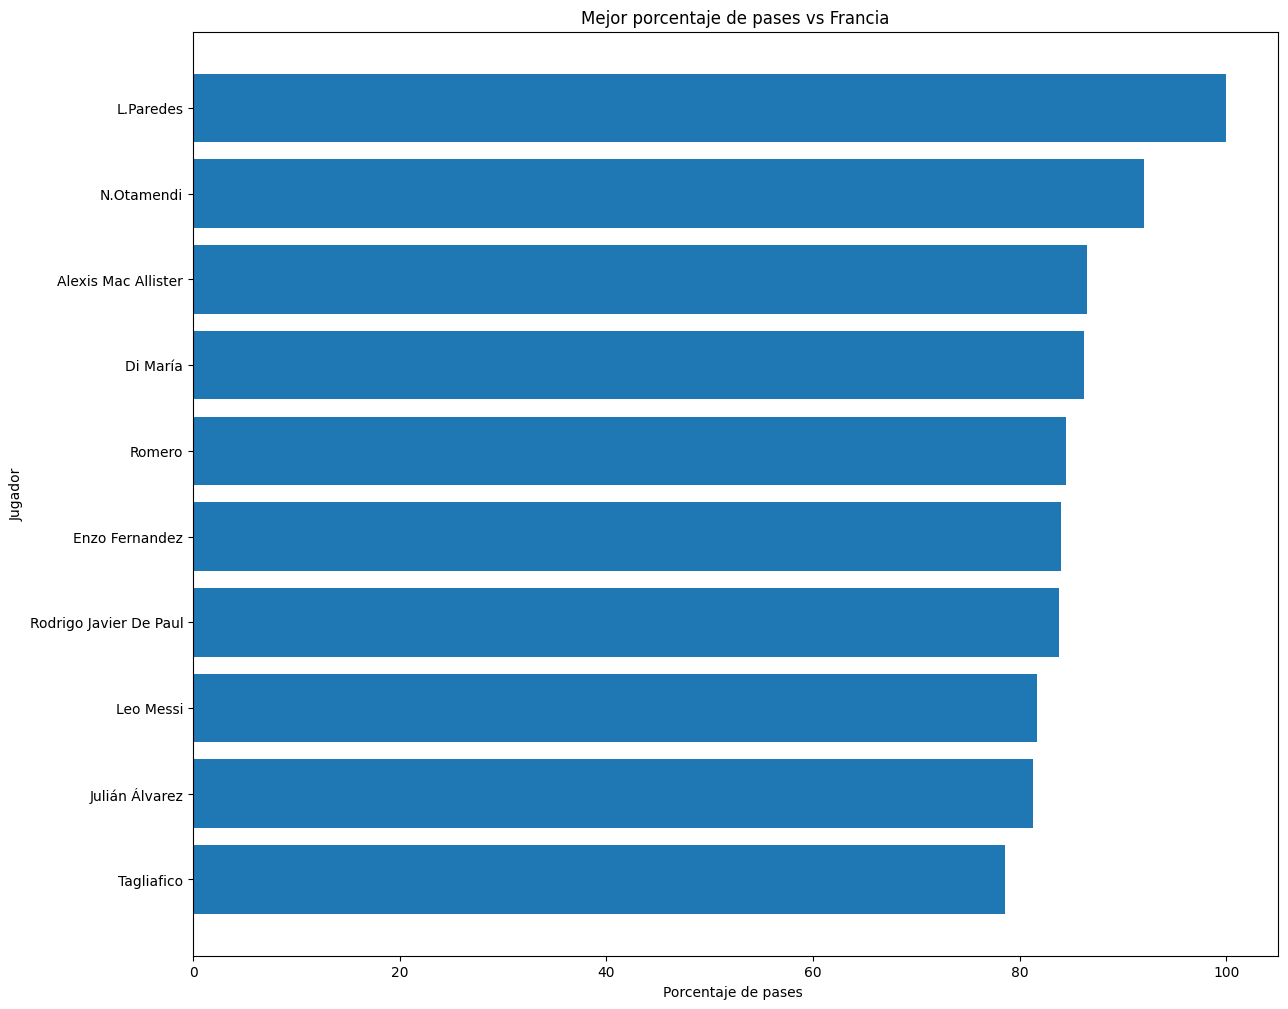

In [ ]:
# Graficas de barras
# Puedes cambiar a grafica vertical utilizando ax.bar en lugar de as.barh (intentalo!)
fig = plt.figure(figsize=(14, 12))
ax = plt.axes()
ax.barh(top_10_porcentaje['player'],
       top_10_porcentaje['Porcentaje %'])
plt.title("Mejor porcentaje de pases vs Francia")
plt.xlabel("Porcentaje de pases ")
plt.ylabel("Jugador")
plt.show()

In [ ]:
# Para ver dos variables de una misma categoria en la misma grafica podemos usar 'barras apiladas' o 'stack graphs'
#De todos los pases los completos e incompletos en una misma imagene y con dos visualisaciones diferentes
#stacked = False opcional  dentro de (plot.bar) para ver las barras apiladas cambiar a 'bar' para vertical
ax = pases_totales[['player','completos','incompletos']].sort_values('completos',
                                 ascending = True).head(10).plot.barh(x='player',stacked=True)
plt.title("Pases vs Francia")
plt.xlabel("# Pases")
plt.ylabel("Jugador")
plt.show()

In [ ]:

'''
Graficando pases en campo de futbol
'''

# detalles de los colores de las lineas en el grafico
white="white"
sbred='#e21017'
lightgrey="#d9d9d9"
darkgrey='#9A9A9A'
cmaplist = [white, darkgrey, sbred]
cmap = LinearSegmentedColormap.from_list("", cmaplist)
#cmap = "cividis"

In [ ]:
# Creando una funcion para crear el mapa de calor y de pases

def passMap(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]

    # Dibujando el campo de futbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='black', line_color='white',line_zorder=6)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    # Contando los pases por zona y coordenadas x & y de finalizacion de los pases para el mapa de calor
    bin_statistic = pitch.bin_statistic(comp.pass_end_x, comp.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

    #Graficando las flechas de los pases de Messi
    pitch.arrows(comp.x, comp.y,
    comp.pass_end_x, comp.pass_end_y, width=3,
    headwidth=8, headlength=5, color="blue", ax=ax, zorder=2, label = "Pase completado")
    pitch.arrows(incomp.x, incomp.y,
    incomp.pass_end_x, incomp.pass_end_y, width=3,
    headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pase fallado")

    # etiquetas de color
    ax.legend(facecolor='white', handlelength=2, edgecolor='None', fontsize=18, loc='upper left')

    # titulo
    ax_title = ax.set_title('Mapa de Pases de ' f'{player} vs Francia', fontsize=30,color='black')

    plt.show()

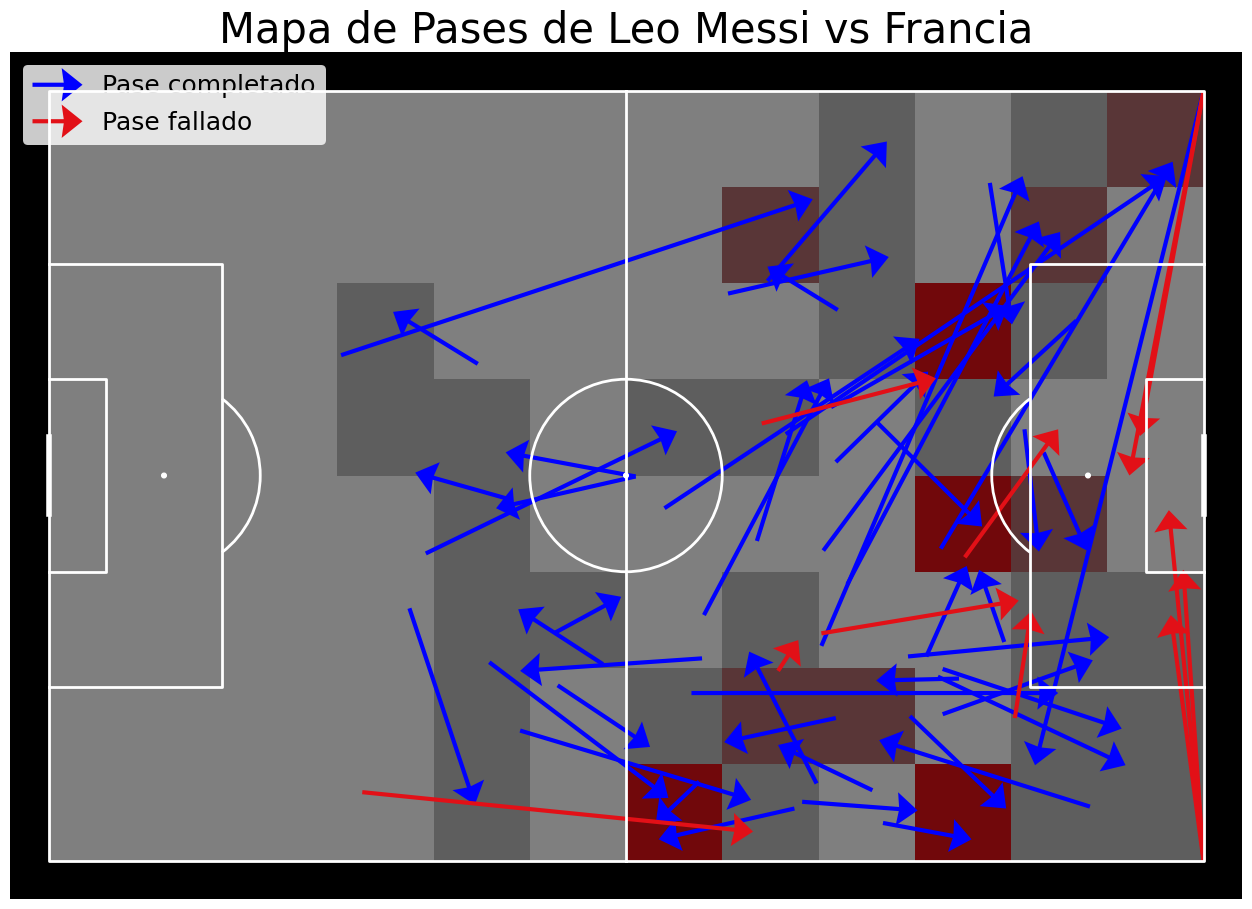

In [ ]:
# Escoge al jugador para analizar para repetir el mismo grafico con otro jugador solo cambia el nombre
# intenta con Emi Martinez,Leo Messi, N.Otamendi, L.Paredes
passMap('Leo Messi')

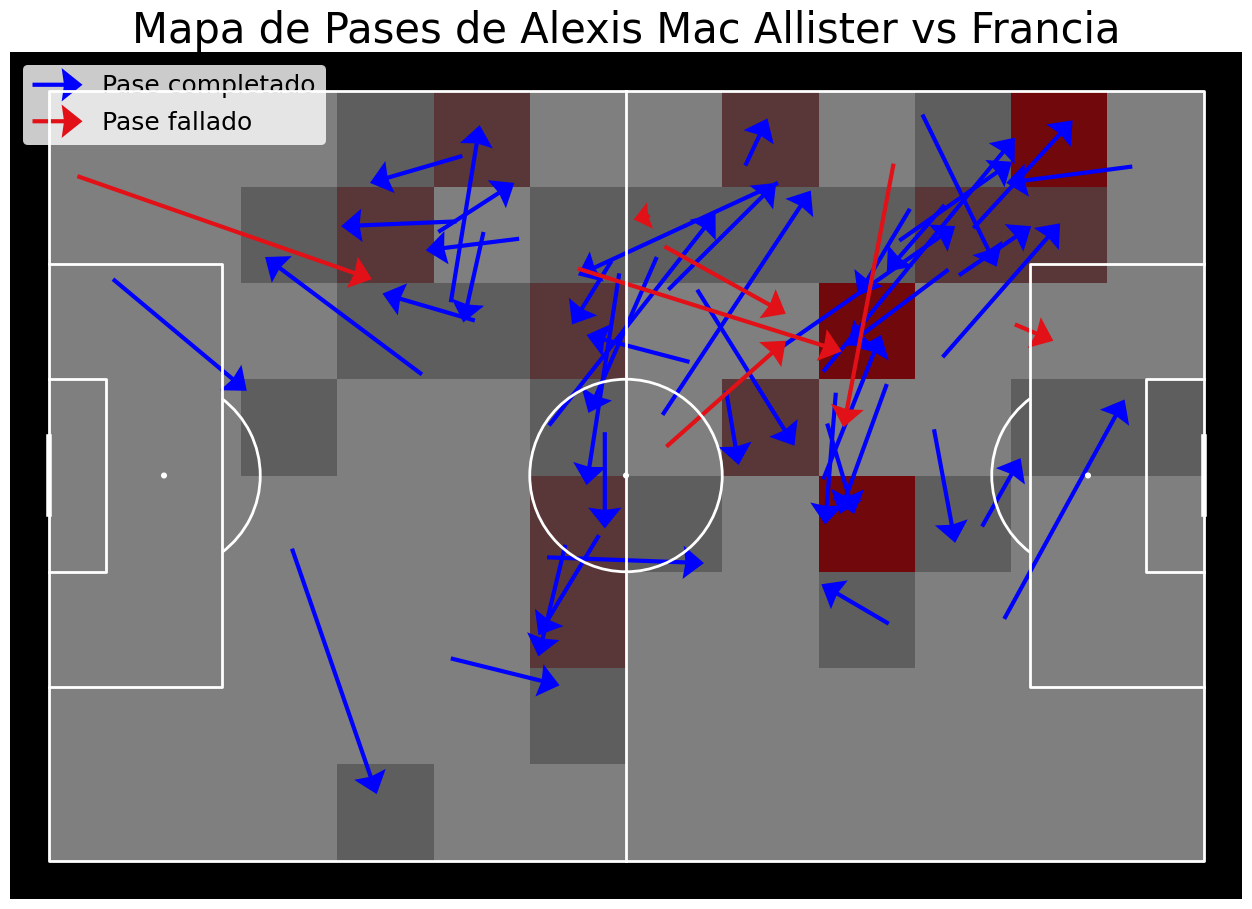

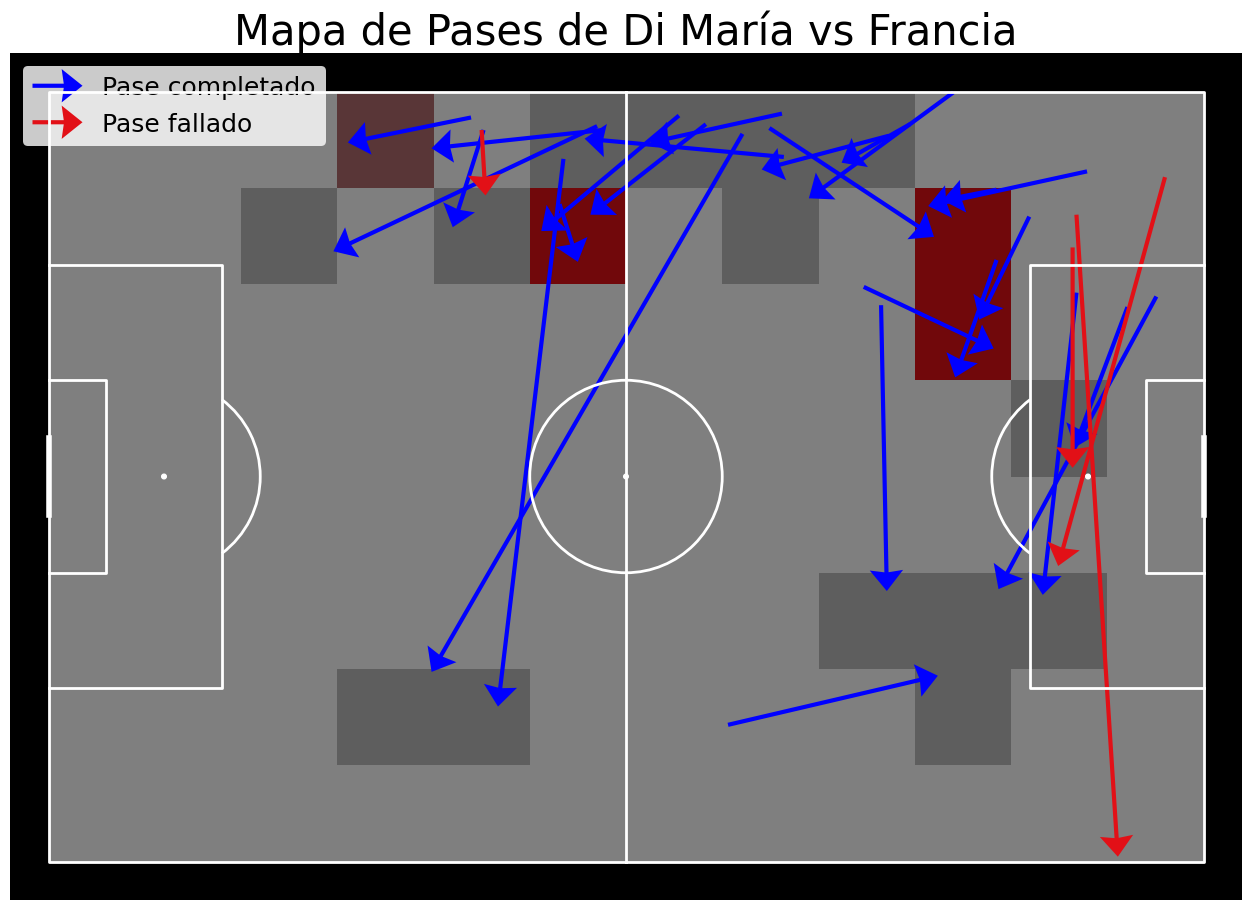

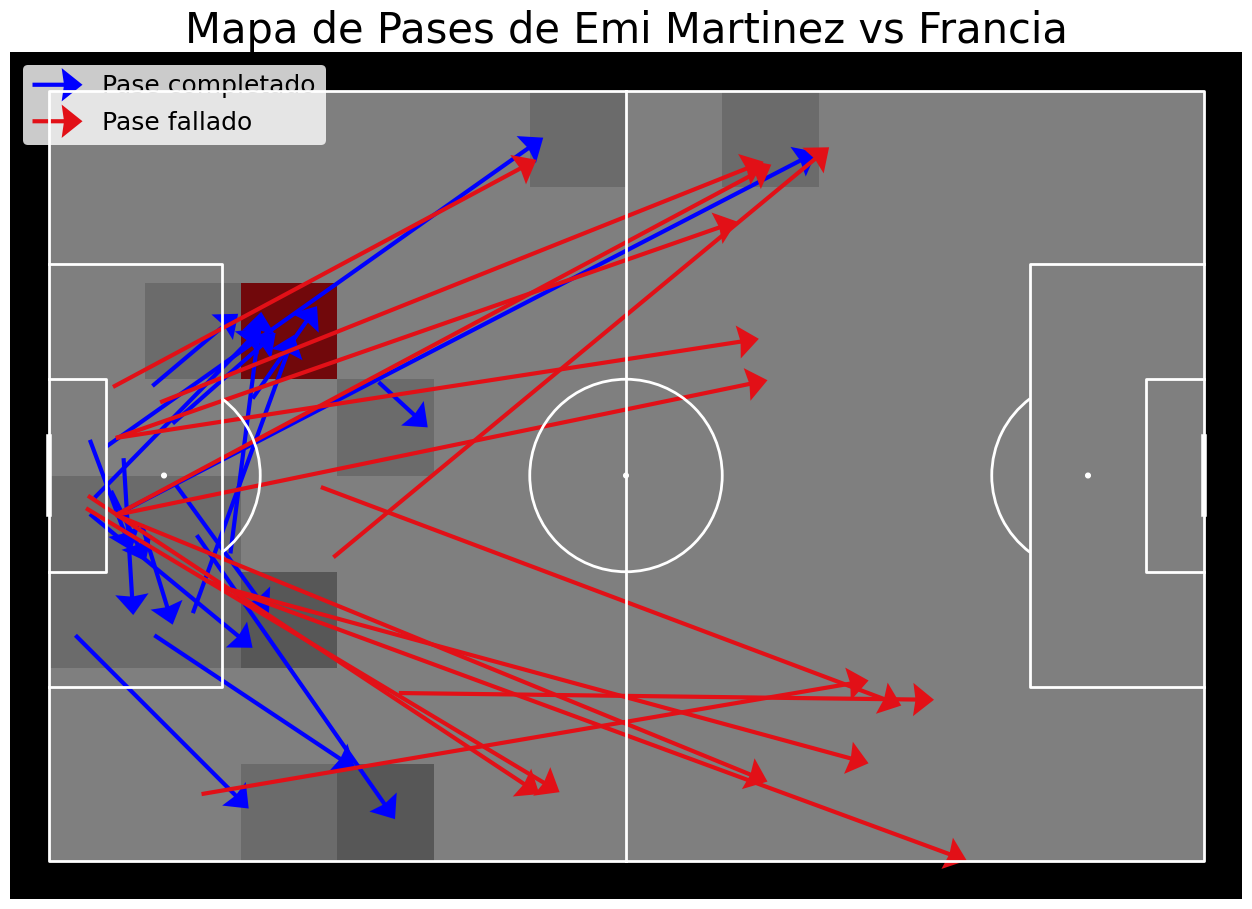

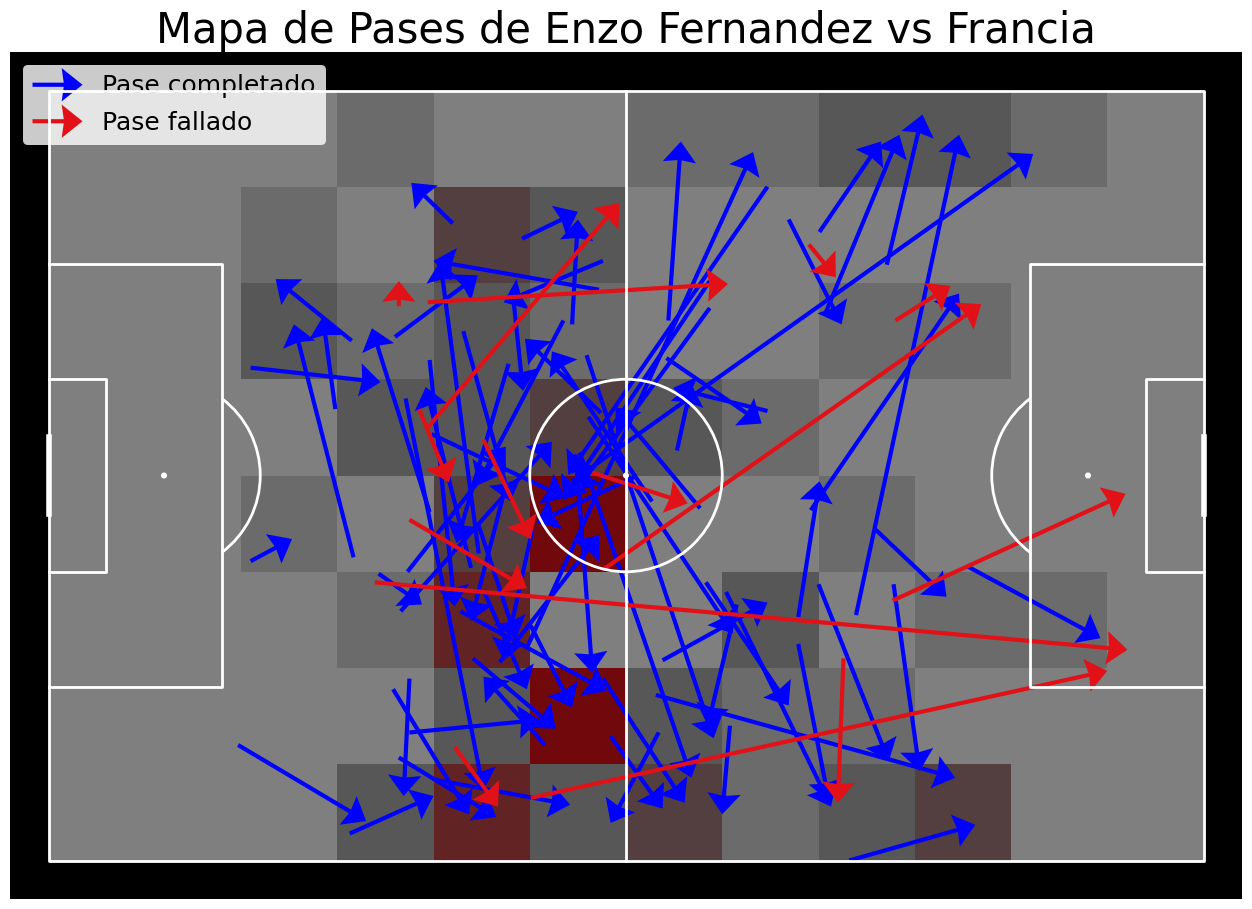

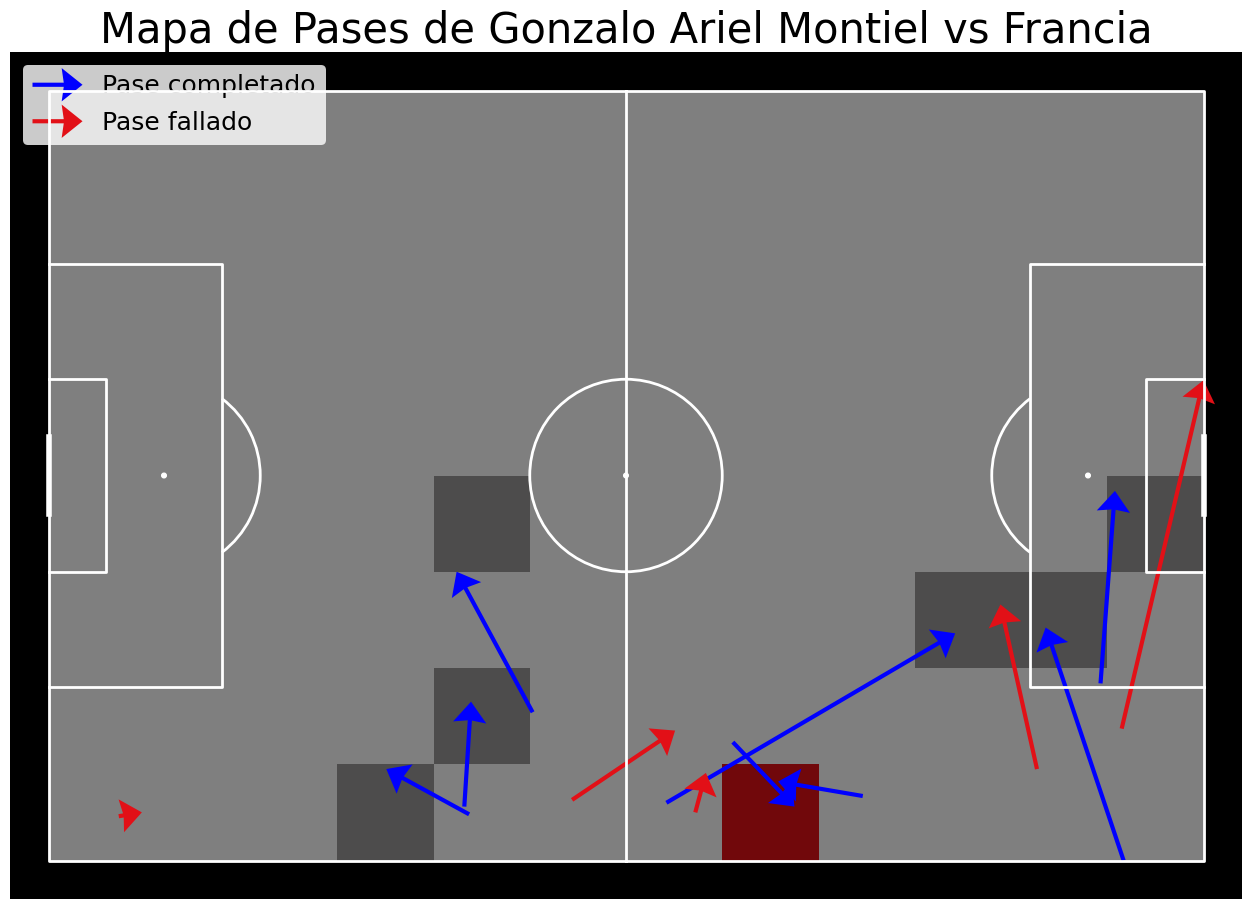

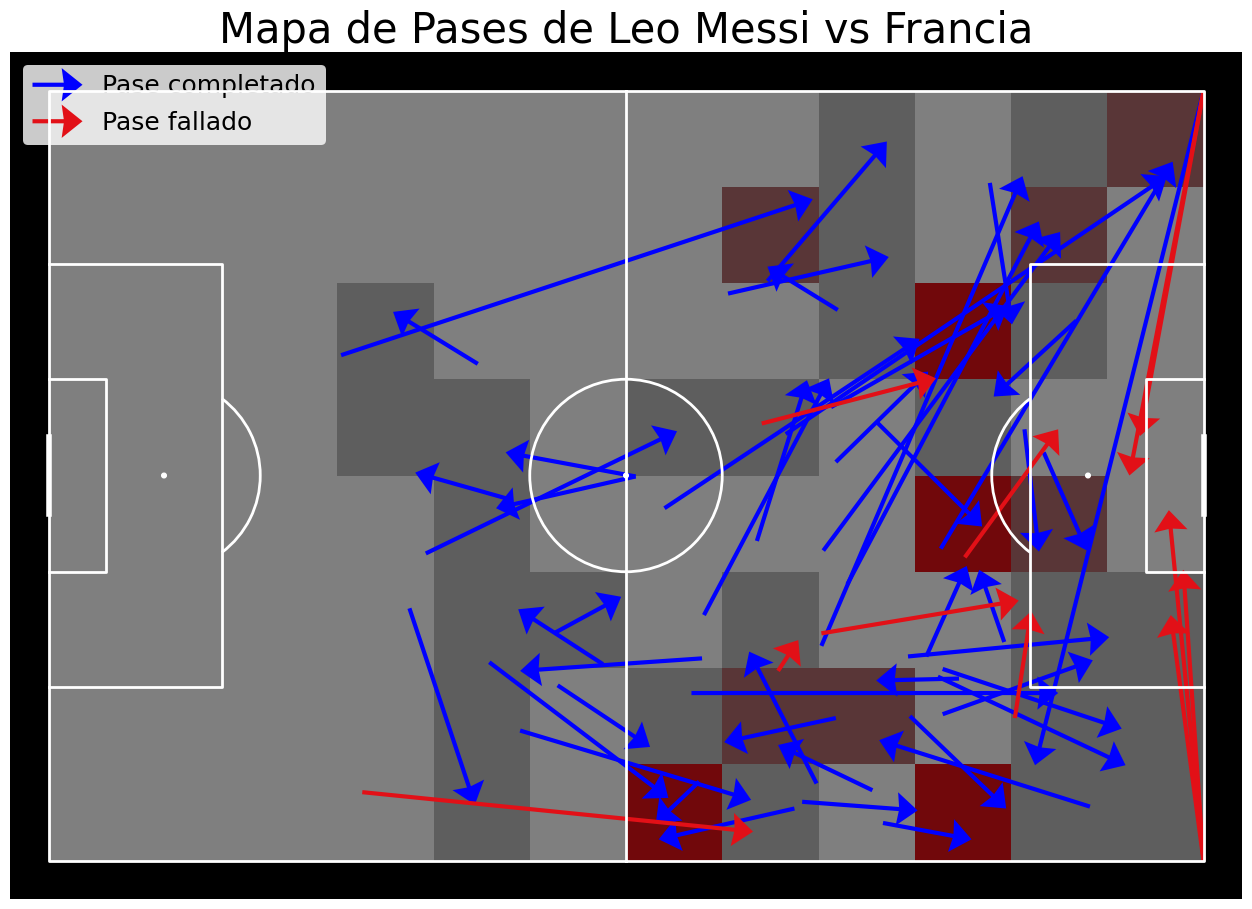

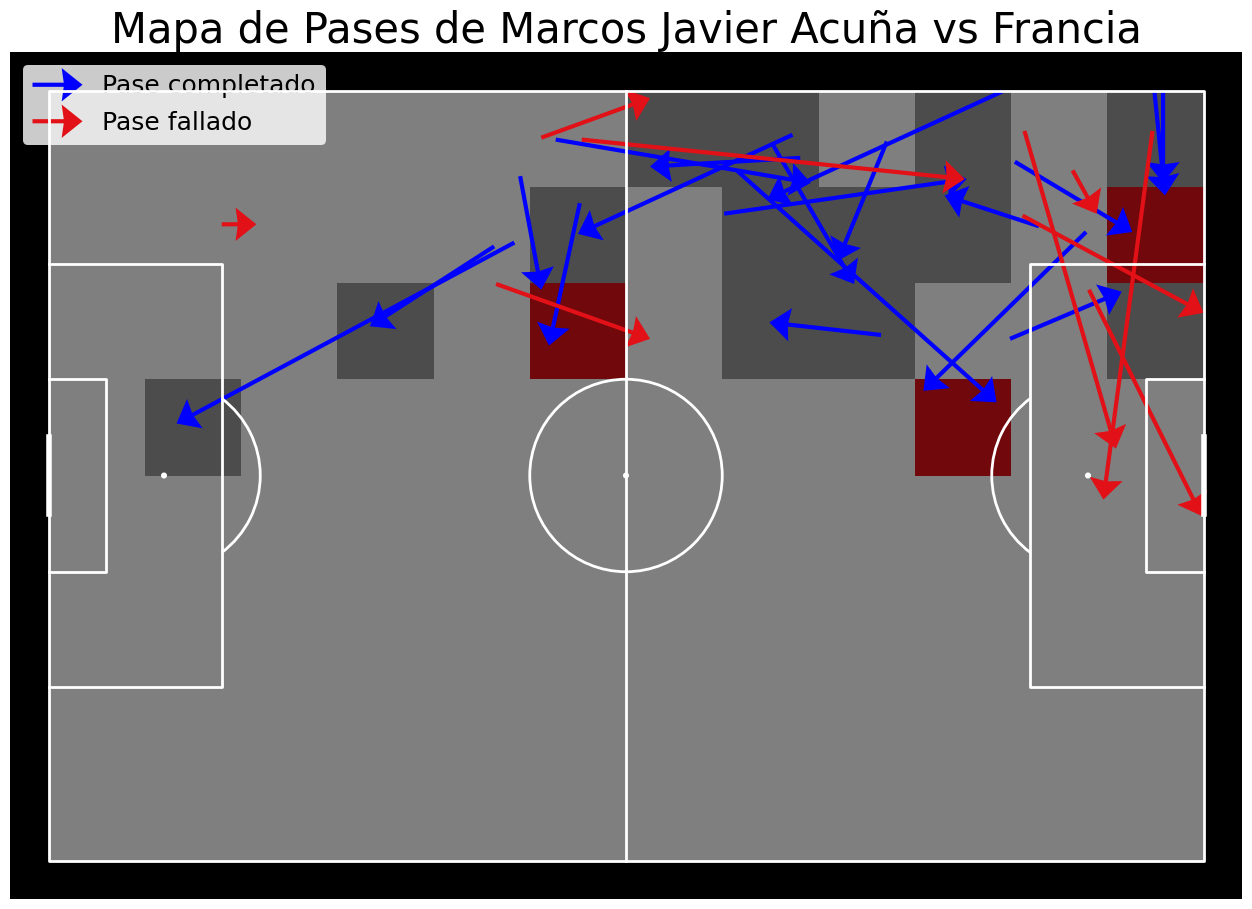

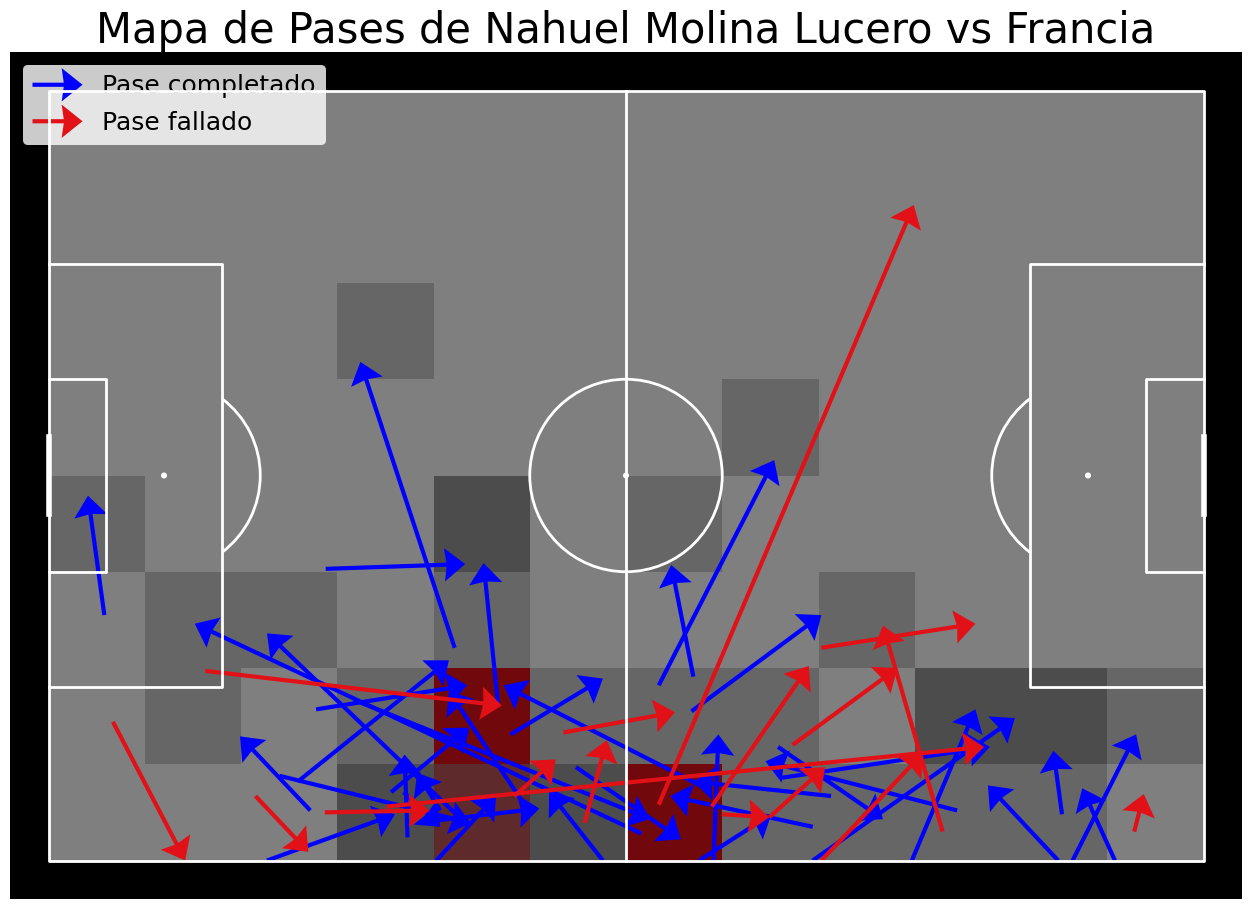

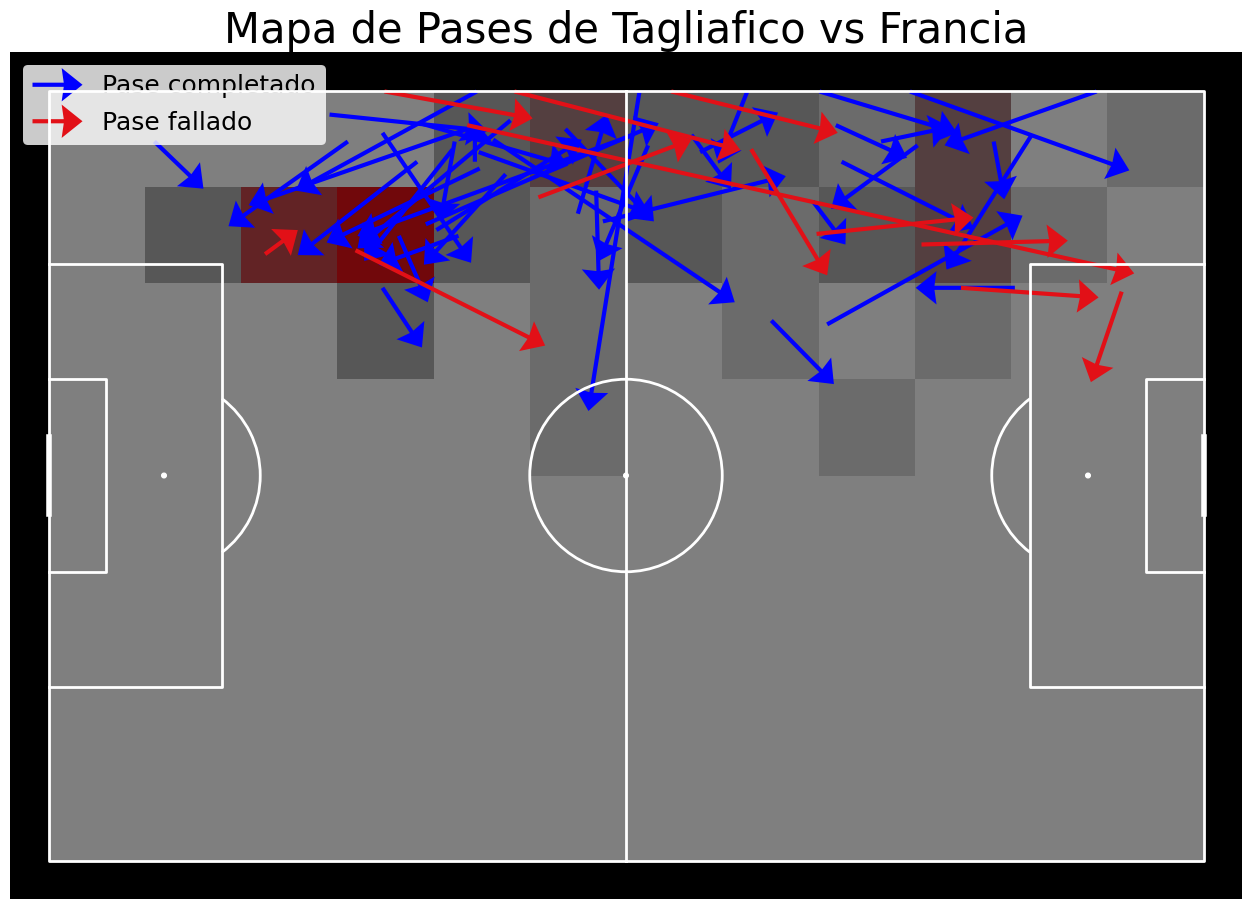

In [ ]:
# para crear el mismo tipo de mapa para muchos jugadores y ahorrar tiempo puedes usar una 'for loop'
#puedes utilizar cualquier base de datos donde esten los nombres de jugadores que quieres utilizar
for player in pases_totales['player'].unique():
    passMap(player)

In [ ]:
'''
pases al ultimo tercio
'''
#vamos a crear el mismo tipo de grafico pero filtrando la base de datos a solo pases al ultimo tercio
#Filtrando por coordenadas pases que empezaron antes del ultimo tercio y terminaron en el ultimo tercio

complete_f3 = completos[(completos["pass_end_x"]>=80)]
incomplete_f3 = incompletos[(incompletos["pass_end_x"]>=80)]
complete_f3 = complete_f3[(complete_f3["x"]<80)]
incomplete_f3 = incomplete_f3[(incomplete_f3["x"]<80)]

In [ ]:
#dibujando el campo de futbol

pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

pitch.arrows(complete_f3.x, complete_f3.y,
complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pase Completo")

pitch.arrows(incomplete_f3.x, incomplete_f3.y,
incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Pase Incompleto")

ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_title = ax.set_title(' Pases de Argentina al ultimo tercio', fontsize=30,color='black')
plt.show()

In [ ]:
#Creando funcion para hacerlo de jugadores en especifico

def passMap_f3(player):

    player=player
    #Filtrando los pases solo del jugador seleccionado
    comp=completos[(completos["player"]==player)]
    incomp=incompletos[(incompletos["player"]==player)]
    complete_f3 = comp[(completos["pass_end_x"]>=80)]
    incomplete_f3 = incomp[(incompletos["pass_end_x"]>=80)]
    complete_f3 = complete_f3[(complete_f3["x"]<80)]
    incomplete_f3 = incomplete_f3[(incomplete_f3["x"]<80)]

    #dibujando el campo de futbol
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black',line_zorder=2)

    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('white')

    #Contando los pases por zona y coordenadas x & y de finalizacion de los pases para el mapa de calor
    bin_statistic = pitch.bin_statistic(complete_f3.pass_end_x, complete_f3.pass_end_y, statistic='count', bins=(12, 8), normalize=True)
    pitch.heatmap(bin_statistic, ax=ax, alpha=0.5, cmap=cmap)

    #Graficando las flechas de los pases de Messi
    pitch.arrows(complete_f3.x, complete_f3.y,
    complete_f3.pass_end_x, complete_f3.pass_end_y, width=3,
    headwidth=8, headlength=5, color=sbred, ax=ax, zorder=2, label = "Pase Completo")
    pitch.arrows(incomplete_f3.x, incomplete_f3.y,
    incomplete_f3.pass_end_x, incomplete_f3.pass_end_y, width=3,
    headwidth=8, headlength=5, color=darkgrey, ax=ax, zorder=2, label = "Pase Fallado")

    #etiquetas de color
    ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

    #titulo
    ax_title = ax.set_title('Pases de ' f'{player} vs Francia al ultimo tercio', fontsize=30,color='black')

    plt.show()

In [ ]:
#Escoge al jugador para analizar para repetir el mismo grafico con otro jugador solo cambia el nombre
passMap_f3('Enzo Fernandez')

In [ ]:
#Gracias por llegar hasta aqui !